# Problem Statement:<br>
## Sales Channel Prediction Case Study.<br>

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . <br>

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. <br>

**This project aims to predict the total sales generated from all the sales channel.**  <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv", index_col='Unnamed: 0')

In [3]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are no null values. TV has more value than Radio and Newspaper and the standard deviation is also more.<br>
27 is the maximum sales that has been attained. Let's look how this is achieved.

<AxesSubplot:xlabel='TV', ylabel='Count'>

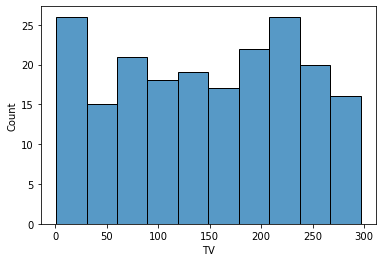

In [6]:
sns.histplot(df['TV'], bins=10)

Plots shows uneven patterns.

<AxesSubplot:xlabel='radio', ylabel='Count'>

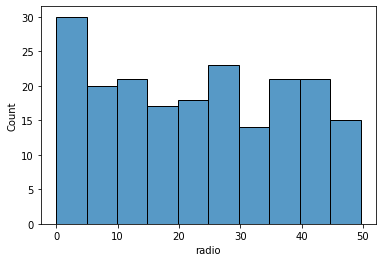

In [7]:
sns.histplot(df['radio'], bins=10)

Same is with radio

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

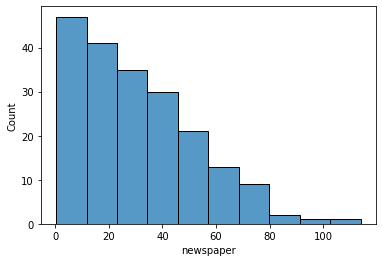

In [8]:
sns.histplot(df['newspaper'], bins=10)

newspaper is strongly right skewed.

<AxesSubplot:xlabel='sales', ylabel='Density'>

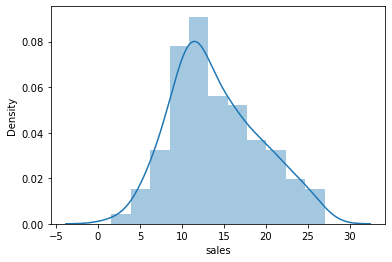

In [9]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='sales', ylabel='Count'>

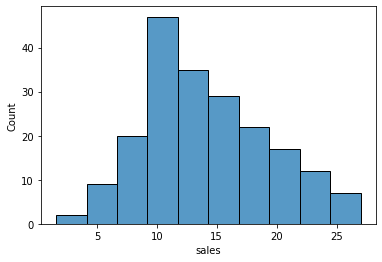

In [10]:
sns.histplot(df['sales'], bins=10)

Sales are normally distributed. 

<AxesSubplot:xlabel='TV', ylabel='radio'>

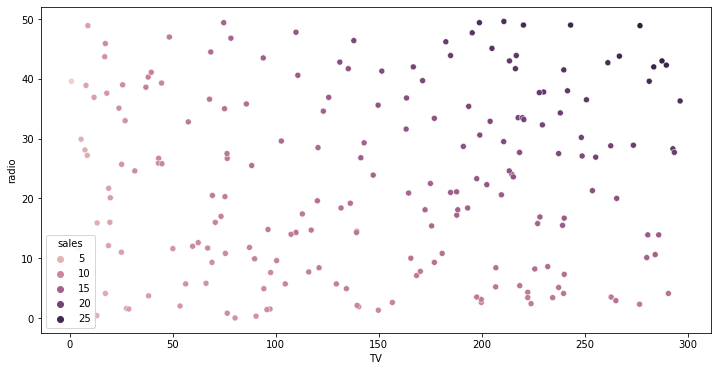

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['TV'],df['radio'], hue=df['sales'], hue_order='size',sizes=(0,30))

Sales are higher when the radio is range of 30-50 and when TV is in range of 200-300. So, yes, sales depend on more promotion based on this plot.

<AxesSubplot:xlabel='newspaper', ylabel='radio'>

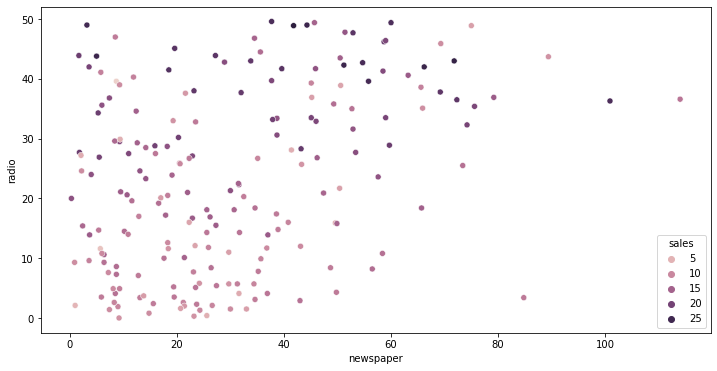

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['newspaper'],df['radio'], hue=df['sales'], hue_order='size',sizes=(0,30))

Newspaper have low value good sales, whereas radio has to be above 30-50 to acheive good sales.

<AxesSubplot:xlabel='newspaper', ylabel='TV'>

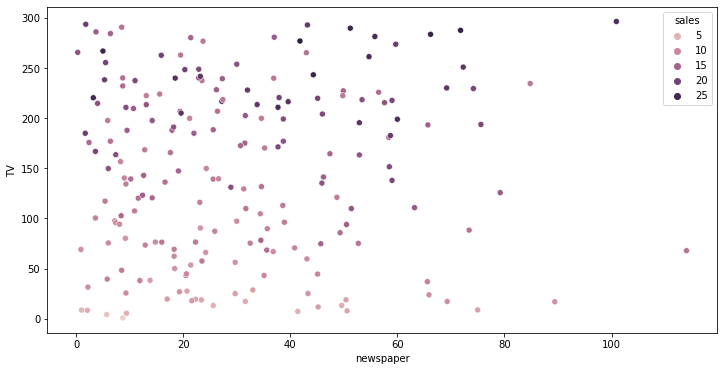

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['newspaper'],df['TV'], hue=df['sales'], hue_order='size',sizes=(0,30))

Same is here between newspaper and TV. Newspaer has good sales even with low value, whereas TV should be avove 200- 300.

<Figure size 720x720 with 0 Axes>

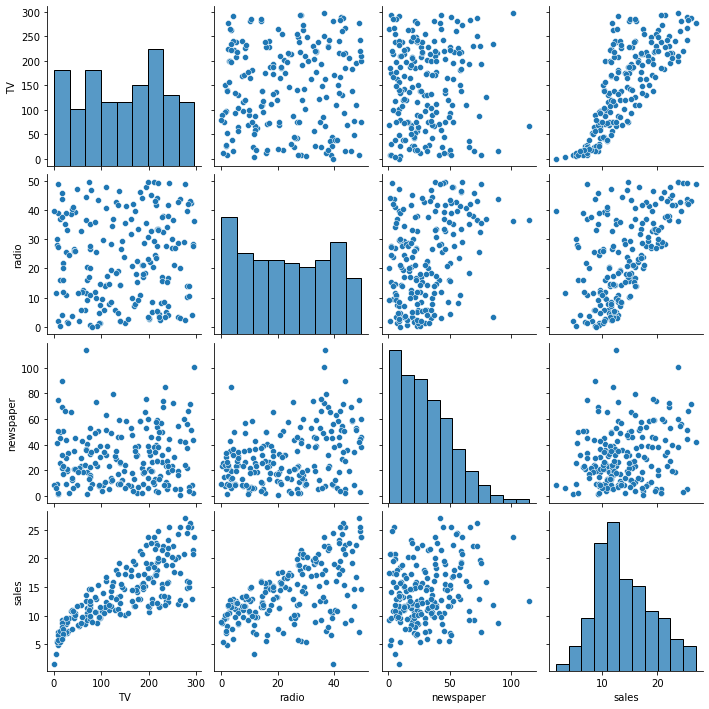

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind="hist")

**Observations:**<br>
    1) Sales increases when the promotion on TV increases.<br>
    2) Same is with radio, sales increases with more promotion on radio.<br>
    3) Newspaper has good sales with very low promotion.

<AxesSubplot:>

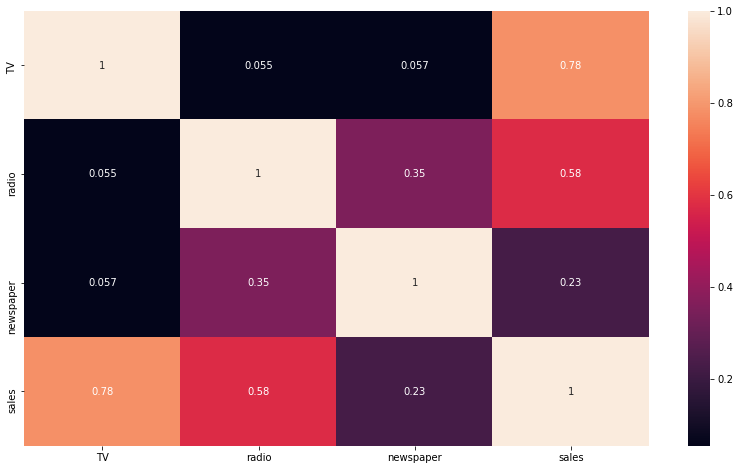

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

**Observations:**<br>
    1) Clearly promotion on newspaper can be low to acheive good sales.<br>
    2) Promotion on TV would be the main factor.<br>
    3) Promotion on radio is also important.

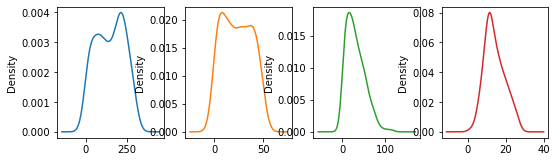

In [16]:
df.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(18,14))
plt.show()

# Outlier and skewness

In [17]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

In [18]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [19]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [20]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [21]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

## Looking into each column

In [22]:
df['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

<AxesSubplot:xlabel='TV', ylabel='Density'>

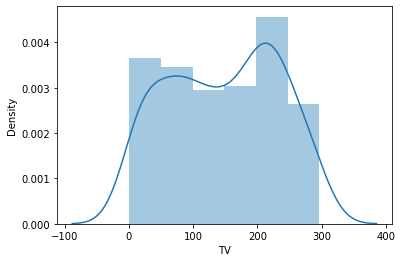

In [23]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='TV'>

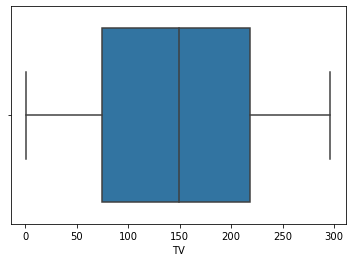

In [24]:
sns.boxplot(df['TV'])

In [25]:
df['TV'].skew()

-0.06985336213274573

All goo with this column

In [26]:
df['radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

<AxesSubplot:xlabel='radio', ylabel='Density'>

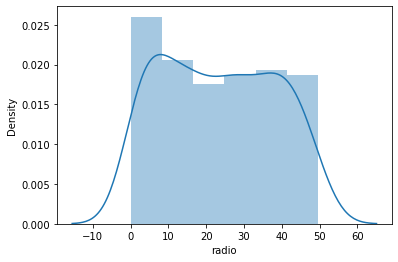

In [27]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='radio'>

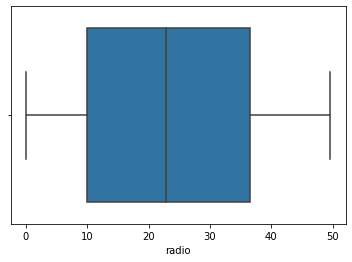

In [28]:
sns.boxplot(df['radio'])

In [29]:
df['radio'].skew()

0.09417463149664404

All good with this column

In [30]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

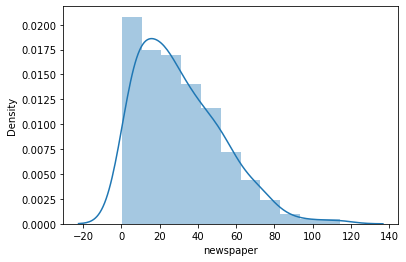

In [31]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='newspaper'>

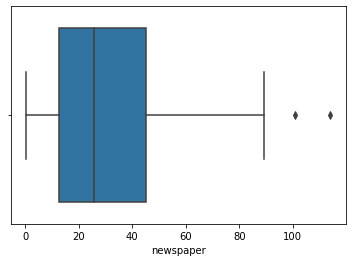

In [32]:
sns.boxplot(df['newspaper'])

In [33]:
outlier_IQR(df, 'newspaper')

(-35.775000000000006, 93.625)

In [34]:
df[df['newspaper']>93.625].shape

(2, 4)

In [35]:
df = df[df['newspaper']<=93.625]

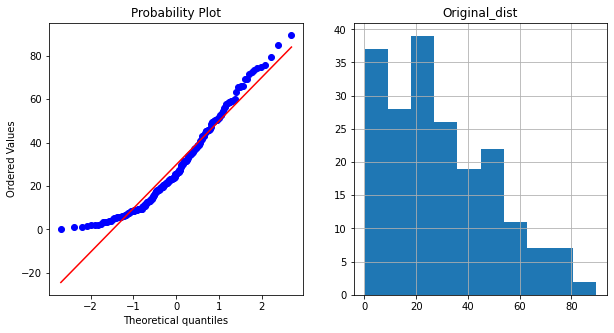

In [36]:
original_dist(df,'newspaper')

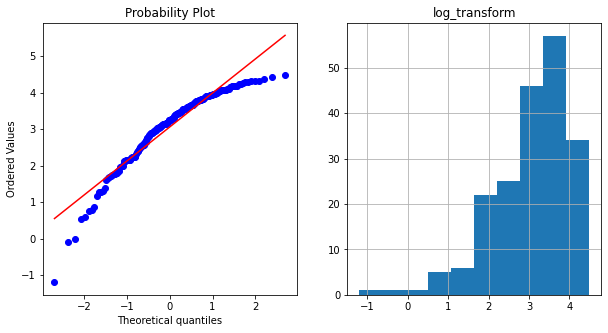

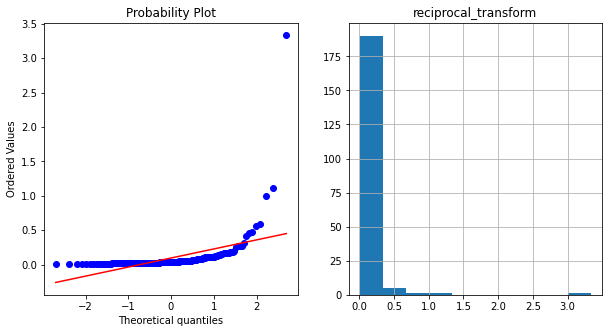

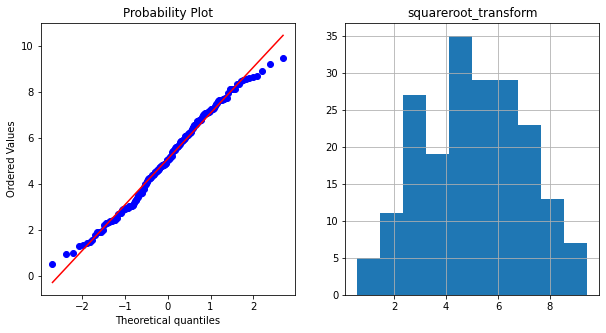

In [37]:
log_transform(df, 'newspaper')

reciprocal_transform(df,'newspaper')

squareroot_transform(df, "newspaper")

In [38]:
df['newspaper'] = (df['newspaper']**(1/2))
df['newspaper'].skew()

-0.040649472621842535

All done. Let's move forward to model building.

In [39]:
x = df.drop("newspaper", axis=1)
y = df['sales']

# **Model Building**

## Finding the best random state for the model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

## Finding the best Random state for our model

In [43]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9997724398157323 on random state 9


Best accuracy is 0.9997096963206181  on random state 179

## Best Algorithm for our problem.

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=179)

In [45]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 5.068431316045001e-30
mean_absolute_error: 1.7097434579227411e-15
r2_score: 1.0
1.0


In [46]:
lr.intercept_

1.7763568394002505e-15

In [47]:
lr.coef_

array([ 1.97406720e-17, -7.90912476e-17,  1.00000000e+00])

In [48]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 0.007999999999999991
mean_absolute_error: 0.049999999999999975
r2_score: 0.9996109947472135
1.0


In [49]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 0.0061976250000005525
mean_absolute_error: 0.05942499999999984
r2_score: 0.9996986364150248
0.999601090181257


In [50]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 0.8894200000000009
mean_absolute_error: 0.7320000000000004
r2_score: 0.9567513685083229
0.9692680234136872


In [51]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 3.5634238884684932
mean_absolute_error: 1.3608889943167726
r2_score: 0.8267261736850835
0.8696045631547127


In [52]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 0.05317268410839032
mean_absolute_error: 0.19251775370591115
r2_score: 0.9974144433221345
0.9980015723193602


All the models perfomed excallently. Let's crossvalidate to be sure with our results.

## Crossvalidation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.9956099955511032


In [55]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.9948946691671507


In [56]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.9547684975946253


In [57]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: 0.8527484988090469


In [58]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 1.0


In [59]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.9901960472648014


Best algorithm would be Logistic regression.

## Hyperparameter Tuning

Just to make sure our algorithm maintains this performance.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Creating parameter list to pass in GridsearchCV

parameters = {'n_jobs': np.arange(1,10), 'copy_X':[True,False]}

In [62]:
GCV = GridSearchCV(LinearRegression(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'n_jobs': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
#Printing the best parameters.
GCV.best_params_

{'copy_X': True, 'n_jobs': 1}

## Model

In [64]:
model = LinearRegression(copy_X= True, n_jobs=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

100.0


**This model will predict sales with 100% accuracy. This is due to only 3 continunous features and less data to train and test on.**

## Saving the Model

In [65]:
import joblib
joblib.dump(model,"advertising_submission.pkl")

['advertising_submission.pkl']